In [ ]:
!pip install numpy
!pip install matplotlib

# No 3-in-line Solution using GA:

Board:
[[0 1 0 0 0]
 [1 0 0 1 0]
 [1 0 0 0 0]
 [0 1 1 1 1]
 [0 1 1 0 0]]
Point Count: 10, Penalties: 4, Fitness: 60
Board:
[[0 1 1 1 1]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 1 1 0]
 [1 0 0 0 0]]
Point Count: 10, Penalties: 5, Fitness: 50
Board:
[[0 0 0 0 0]
 [1 0 0 1 1]
 [1 0 0 0 1]
 [0 0 1 1 1]
 [1 0 1 0 0]]
Point Count: 10, Penalties: 5, Fitness: 50
Board:
[[0 1 1 0 1]
 [0 1 1 1 0]
 [0 1 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]]
Point Count: 10, Penalties: 6, Fitness: 40
Board:
[[1 0 0 1 0]
 [0 0 0 0 0]
 [1 1 0 1 1]
 [0 0 1 0 1]
 [0 1 1 0 0]]
Point Count: 10, Penalties: 3, Fitness: 70
Board:
[[0 1 1 0 1]
 [0 0 0 0 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 1 1 0 1]]
Point Count: 10, Penalties: 6, Fitness: 40
Board:
[[1 0 1 0 0]
 [0 0 1 1 1]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
Point Count: 10, Penalties: 5, Fitness: 50
Board:
[[0 0 1 1 0]
 [0 0 1 0 1]
 [0 1 0 1 0]
 [0 1 1 0 0]
 [0 1 1 0 0]]
Point Count: 10, Penalties: 6, Fitness: 40
Board:
[[1 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [1 0 0 1 0]]

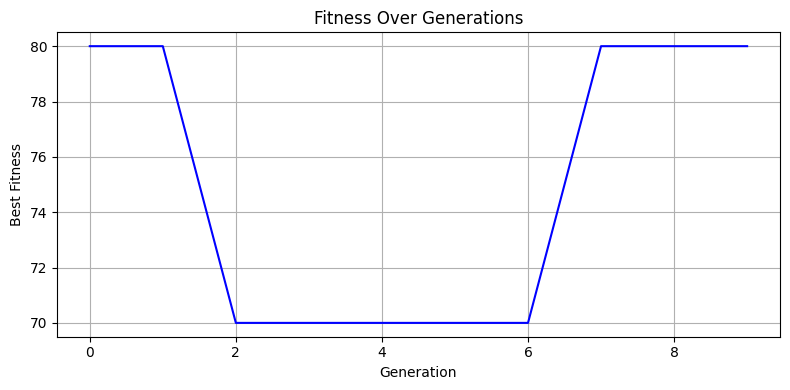

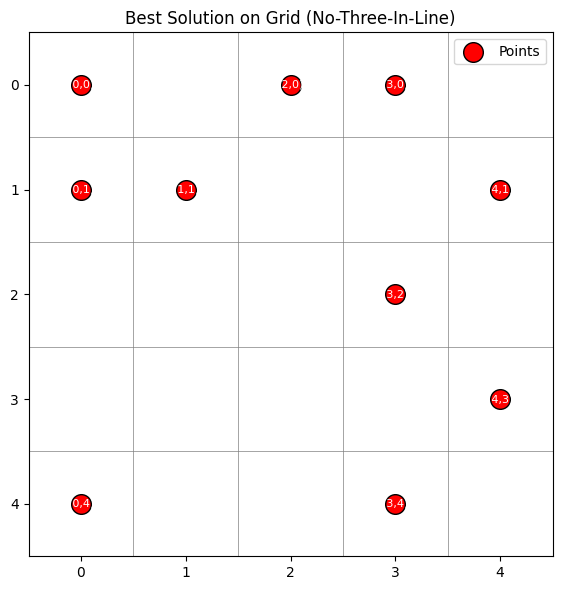

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


def intToBinary(num: int, gridRowLength: int) -> str:
    bits = int(math.ceil(math.log2(gridRowLength)))
    return bin(num)[2:].zfill(bits)

def binaryToInt(binaryStr: str) -> int:
    return int(binaryStr, 2)

def clamp(val, max_val):
    return min(val, max_val - 1)

def initialize_population(populationSize: int, gridRowLength: int) -> list:
    population = []
    num_points = 2 * gridRowLength  

    for _ in range(populationSize):
        all_coords = [(x, y) for x in range(gridRowLength) for y in range(gridRowLength)]
        selected_coords = random.sample(all_coords, num_points)
        points = [(intToBinary(x, gridRowLength), intToBinary(y, gridRowLength)) for x, y in selected_coords]
        population.append(points)

    return population


def fillBoard(gridSize: int, binaryPoints: list) -> np.ndarray:
    board = np.zeros((gridSize, gridSize), dtype=int)
    for x_bin, y_bin in binaryPoints:
        x = clamp(binaryToInt(x_bin), gridSize)
        y = clamp(binaryToInt(y_bin), gridSize)
        board[x][y] = 1
    return board

def calculateFitness(board: np.ndarray) -> int:
    penalties = 0
    N = len(board)
    point_count = np.sum(board)
    max_points = 2 * N

    for i in range(N):
        row_sum = np.sum(board[i, :])
        col_sum = np.sum(board[:, i])
        if row_sum > 2:
            penalties += row_sum - 2
        if col_sum > 2:
            penalties += col_sum - 2

    for k in range(-N + 1, N):
        diag_sum = np.sum(np.diagonal(board, offset=k))
        anti_diag_sum = np.sum(np.diagonal(np.fliplr(board), offset=k))
        if diag_sum > 2:
            penalties += diag_sum - 2
        if anti_diag_sum > 2:
            penalties += anti_diag_sum - 2

    fitness = (point_count / max_points) * 100 - 10 * penalties

    print(f"Board:\n{board}")
    print(f"Point Count: {point_count}, Penalties: {penalties}, Fitness: {max(0, int(fitness))}")

    return max(0, int(fitness))



def crossover(parent1, parent2):
    child = []
    for p1, p2 in zip(parent1, parent2):
        point = random.randint(0, len(p1[0] + p1[1]) - 1)
        genome1 = p1[0] + p1[1]
        genome2 = p2[0] + p2[1]
        child_genome = genome1[:point] + genome2[point:]
        mid = len(child_genome) // 2
        child.append((child_genome[:mid], child_genome[mid:]))
    return child

def mutate(individual, mutation_rate=0.01):
    mutated = []
    for x_bin, y_bin in individual:
        genome = x_bin + y_bin
        genome = ''.join('1' if (bit == '0' and random.random() < mutation_rate) else
                         '0' if (bit == '1' and random.random() < mutation_rate) else bit for bit in genome)
        mid = len(genome) // 2
        mutated.append((genome[:mid], genome[mid:]))
    return mutated

def select_parents(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0], selected[1][0]

def evolve_population(population, gridSize, mutation_rate):
    fitnesses = [calculateFitness(fillBoard(gridSize, ind)) for ind in population]
    new_population = []
    for _ in range(len(population)):
        p1, p2 = select_parents(population, fitnesses)
        child = crossover(p1, p2)
        child = mutate(child, mutation_rate)
        new_population.append(child)
    return new_population, fitnesses


def plot_grid_with_points(board_size, points):
    fig, ax = plt.subplots(figsize=(6, 6))

    for x in range(board_size + 1):
        ax.axhline(x - 0.5, color='gray', linewidth=0.5)
        ax.axvline(x - 0.5, color='gray', linewidth=0.5)

    ax.set_xticks(range(board_size))
    ax.set_yticks(range(board_size))
    ax.set_xlim(-0.5, board_size - 0.5)
    ax.set_ylim(-0.5, board_size - 0.5)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.grid(False)

    xs, ys = zip(*points)
    ax.scatter(xs, ys, color='red', edgecolors='black', s=200, zorder=5, label='Points')


    for x, y in points:
        ax.text(x, y, f'({x},{y})', ha='center', va='center', fontsize=8, color='white', zorder=6)

    ax.set_title("Best Solution on Grid (No-Three-In-Line)", fontsize=12)
    ax.legend()
    plt.tight_layout()
    plt.show()


gridSize = 10
pointsNumber = gridSize*2 
populationSize = 30
GENERATIONS = 100
MUTATION_RATE = 0.02

population = initialize_population(populationSize, gridSize)
best_fitness_progress = []

for gen in range(GENERATIONS):
    population, fitnesses = evolve_population(population, gridSize, MUTATION_RATE)
    best_fitness = max(fitnesses)
    best_fitness_progress.append(best_fitness)

best_idx = np.argmax(fitnesses)
best_individual = population[best_idx]
filled_board = fillBoard(gridSize, best_individual)
best_coords = [(clamp(binaryToInt(x), gridSize), clamp(binaryToInt(y), gridSize)) for x, y in best_individual]


print("Best Fitness:", fitnesses[best_idx])
print("Selected Points:", best_coords)

print("\nChessboard Matrix:")
for row in filled_board:
    print(" ".join(str(cell) for cell in row))

plt.figure(figsize=(8, 4))
plt.plot(best_fitness_progress, color='blue')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.grid()
plt.tight_layout()
plt.show()

plot_grid_with_points(gridSize, best_coords)

monte_carlo_runs = 50
average_best_fitness = []

for _ in range(monte_carlo_runs):
    population = initialize_population(populationSize, gridSize)
    best_fitness_progress = []

    for gen in range(GENERATIONS):
        population, fitnesses = evolve_population(population, gridSize, MUTATION_RATE)
        best_fitness = max(fitnesses)
        best_fitness_progress.append(best_fitness)

    average_best_fitness.append(max(best_fitness_progress))

average_fitness = sum(average_best_fitness) / monte_carlo_runs
print(f"Average Best Fitness over {monte_carlo_runs} runs: {average_fitness}")

# N-Queen Solution using GA:

Board:
[[0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]]
Point Count: 8, Penalties: 7, Fitness: 30
Board:
[[0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 1]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
Point Count: 8, Penalties: 9, Fitness: 10
Board:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0]]
Point Count: 8, Penalties: 6, Fitness: 40
Board:
[[0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]]
Point Count: 8, Penalties: 9, Fitness: 10
Board:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]]
Point Count: 8, Penalties: 7, Fi

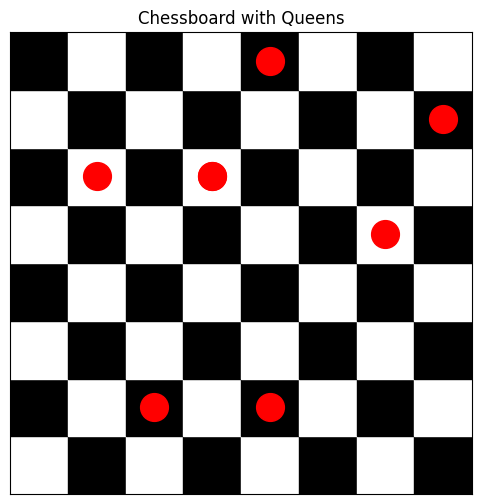

Board:
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1]]
Point Count: 8, Penalties: 9, Fitness: 10
Board:
[[0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
Point Count: 8, Penalties: 9, Fitness: 10
Board:
[[0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]]
Point Count: 8, Penalties: 8, Fitness: 20
Board:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0]]
Point Count: 8, Penalties: 8, Fitness: 20
Board:
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1]
 [0 1 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]
Point Count: 8, Penalties: 10, F

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


def intToBinary(num: int, gridRowLength: int) -> str:
    bits = int(math.ceil(math.log2(gridRowLength)))
    return bin(num)[2:].zfill(bits)

def binaryToInt(binaryStr: str) -> int:
    return int(binaryStr, 2)

def clamp(val, max_val):
    return min(val, max_val - 1)

def initialize_population(populationSize: int, gridRowLength: int) -> list:
    population = []
    num_points = gridRowLength

    for _ in range(populationSize):
        all_coords = [(x, y) for x in range(gridRowLength) for y in range(gridRowLength)]
        selected_coords = random.sample(all_coords, num_points)
        points = [(intToBinary(x, gridRowLength), intToBinary(y, gridRowLength)) for x, y in selected_coords]
        population.append(points)

    return population


def fillBoard(gridSize: int, binaryPoints: list) -> np.ndarray:
    board = np.zeros((gridSize, gridSize), dtype=int)
    for x_bin, y_bin in binaryPoints:
        x = clamp(binaryToInt(x_bin), gridSize)
        y = clamp(binaryToInt(y_bin), gridSize)
        board[x][y] = 1
    return board

def calculateFitness(board: np.ndarray) -> int:
    penalties = 0
    N = len(board)
    point_count = np.sum(board)
    max_points = N

    for i in range(N):
        row_sum = np.sum(board[i, :])
        col_sum = np.sum(board[:, i])
        if row_sum > 1:
            penalties += row_sum - 1
        if col_sum > 1:
            penalties += col_sum - 1

    for k in range(-N + 1, N):
        diag_sum = np.sum(np.diagonal(board, offset=k))
        anti_diag_sum = np.sum(np.diagonal(np.fliplr(board), offset=k))
        if diag_sum > 1:
            penalties += diag_sum - 1
        if anti_diag_sum > 1:
            penalties += anti_diag_sum - 1

    fitness = (point_count / max_points) * 100 - 10 * penalties

    print(f"Board:\n{board}")
    print(f"Point Count: {point_count}, Penalties: {penalties}, Fitness: {max(0, int(fitness))}")

    return max(0, int(fitness))



def crossover(parent1, parent2):
    child = []
    for p1, p2 in zip(parent1, parent2):
        point = random.randint(0, len(p1[0] + p1[1]) - 1)
        genome1 = p1[0] + p1[1]
        genome2 = p2[0] + p2[1]
        child_genome = genome1[:point] + genome2[point:]
        mid = len(child_genome) // 2
        child.append((child_genome[:mid], child_genome[mid:]))
    return child

def mutate(individual, mutation_rate=0.01):
    mutated = []
    for x_bin, y_bin in individual:
        genome = x_bin + y_bin
        genome = ''.join('1' if (bit == '0' and random.random() < mutation_rate) else
                         '0' if (bit == '1' and random.random() < mutation_rate) else bit for bit in genome)
        mid = len(genome) // 2
        mutated.append((genome[:mid], genome[mid:]))
    return mutated

def select_parents(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0], selected[1][0]

def evolve_population(population, gridSize, mutation_rate):
    fitnesses = [calculateFitness(fillBoard(gridSize, ind)) for ind in population]
    new_population = []
    for _ in range(len(population)):
        p1, p2 = select_parents(population, fitnesses)
        child = crossover(p1, p2)
        child = mutate(child, mutation_rate)
        new_population.append(child)
    return new_population, fitnesses


def plot_grid_with_points(board_size, points):
    fig, ax = plt.subplots(figsize=(6, 6))

    for x in range(board_size + 1):
        ax.axhline(x - 0.5, color='gray', linewidth=0.5)
        ax.axvline(x - 0.5, color='gray', linewidth=0.5)

    ax.set_xticks(range(board_size))
    ax.set_yticks(range(board_size))
    ax.set_xlim(-0.5, board_size - 0.5)
    ax.set_ylim(-0.5, board_size - 0.5)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.grid(False)

    xs, ys = zip(*points)
    ax.scatter(xs, ys, color='red', edgecolors='black', s=200, zorder=5, label='Points')

    for x, y in points:
        ax.text(x, y, f'({x},{y})', ha='center', va='center', fontsize=8, color='white', zorder=6)

    ax.set_title("Best Solution on Grid (No-Three-In-Line)", fontsize=12)
    ax.legend()
    plt.tight_layout()
    plt.show()


gridSize = 8
pointsNumber = gridSize
populationSize = 30
GENERATIONS = 10
MUTATION_RATE = 0.02

population = initialize_population(populationSize, gridSize)
best_fitness_progress = []

for gen in range(GENERATIONS):
    population, fitnesses = evolve_population(population, gridSize, MUTATION_RATE)
    best_fitness = max(fitnesses)
    best_fitness_progress.append(best_fitness)

best_idx = np.argmax(fitnesses)
best_individual = population[best_idx]
filled_board = fillBoard(gridSize, best_individual)
best_coords = [(clamp(binaryToInt(x), gridSize), clamp(binaryToInt(y), gridSize)) for x, y in best_individual]


print("Best Fitness:", fitnesses[best_idx])
print("Selected Points:", best_coords)

def plot_chessboard_with_queens(board_size, queens):
    fig, ax = plt.subplots(figsize=(6, 6))

    for x in range(board_size):
        for y in range(board_size):
            color = 'white' if (x + y) % 2 == 0 else 'black'
            ax.add_patch(plt.Rectangle((x, y), 1, 1, color=color))

    for x, y in queens:
        ax.plot(x + 0.5, y + 0.5, 'ro', markersize=20)

    ax.set_xlim(0, board_size)
    ax.set_ylim(0, board_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.title("Chessboard with Queens")
    plt.show()

plot_chessboard_with_queens(gridSize, best_coords)

monte_carlo_runs = 50
average_best_fitness = []

for _ in range(monte_carlo_runs):
    population = initialize_population(populationSize, gridSize)
    best_fitness_progress = []

    for gen in range(GENERATIONS):
        population, fitnesses = evolve_population(population, gridSize, MUTATION_RATE)
        best_fitness = max(fitnesses)
        best_fitness_progress.append(best_fitness)

    average_best_fitness.append(max(best_fitness_progress))

average_fitness = sum(average_best_fitness) / monte_carlo_runs
print(f"Average Best Fitness over {monte_carlo_runs} runs: {average_fitness}")